In [1]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
#data importation(it is preprocessed data that we stored in a csv file only the nine relevent features seven million rows)
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\featured_data.csv"
df=pd.read_csv(path,low_memory=False,delimiter=',')

# REDUCE THE NON FRAUDE TO 100000

In [5]:
import pandas as pd


# Separate fraudulent and non-fraudulent events
fraudulent_df = df[df['FRAUD'] == 1]
non_fraudulent_df = df[df['FRAUD'] == 0]

# Sample one million rows from non-fraudulent events
sampled_non_fraudulent_df = non_fraudulent_df.sample(n=100000, random_state=42)  # You can adjust the random_state for reproducibility

# Combine fraudulent and sampled non-fraudulent events
final_df = pd.concat([fraudulent_df, sampled_non_fraudulent_df])

# Shuffle the final DataFrame to randomize the order
final_df = final_df.sample(frac=1, random_state=42)  # Shuffle while maintaining the random_state for reproducibility


In [6]:
final_df.shape

(107582, 11)

In [7]:
df.to_csv("reduce_non_fraud_100000_11columns.csv",index=False,sep=',')

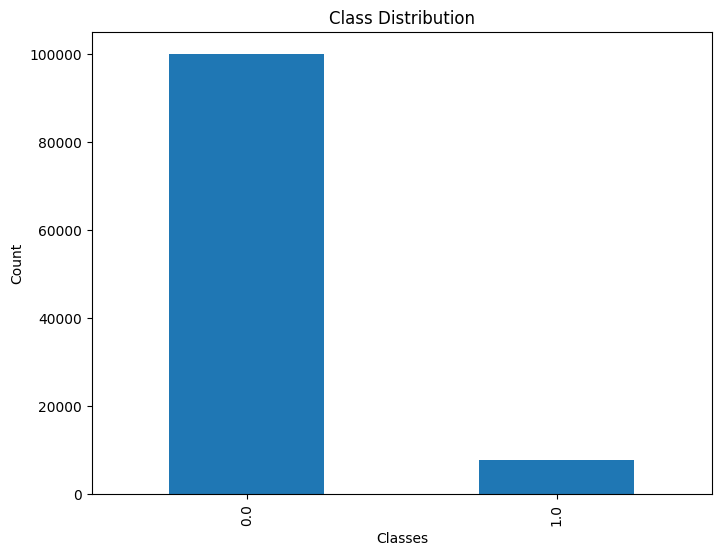

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = final_df['FRAUD'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [8]:
import pandas as pd

fraud_counts = final_df['FRAUD'].value_counts()
total_samples = final_df.shape[0]

fraud_percentage = (fraud_counts / total_samples) * 100

print("Class 0 (Non-Fraudulent) percentage:", fraud_percentage[0], "%")
print("Class 1 (Fraudulent) percentage:", fraud_percentage[1], "%")


Class 0 (Non-Fraudulent) percentage: 92.9523526240449 %
Class 1 (Fraudulent) percentage: 7.047647375955085 %


In [9]:
# Check the target distribution
final_df['FRAUD'].value_counts(normalize = True)

FRAUD
0.0    0.929524
1.0    0.070476
Name: proportion, dtype: float64

In [10]:
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [11]:
# Splitting into features (X) and target (y)
X = final_df.drop('FRAUD', axis=1)  
y = final_df['FRAUD'].astype('int32')

# Splitting into training and testing sets for features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
y

6315135    0
233369     0
349916     0
5284323    0
294792     0
          ..
2051871    0
3747054    0
4008971    0
258476     1
6515878    0
Name: FRAUD, Length: 107582, dtype: int32

In [14]:
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [15]:
# Predict the anomalies
prediction = one_class_svm.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     30062
           1       0.01      0.00      0.00      2213

    accuracy                           0.92     32275
   macro avg       0.47      0.50      0.48     32275
weighted avg       0.87      0.92      0.89     32275



In [51]:
print(prediction)

[1 1 1 ... 1 1 1]


In [17]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 50% of outliers
score_threshold = np.percentile(score, 50)
print(f'The customized score threshold for 50% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction))

The customized score threshold for 50% of outliers is 92.41
              precision    recall  f1-score   support

           0       0.98      0.52      0.68     30062
           1       0.11      0.82      0.20      2213

    accuracy                           0.54     32275
   macro avg       0.54      0.67      0.44     32275
weighted avg       0.92      0.54      0.65     32275



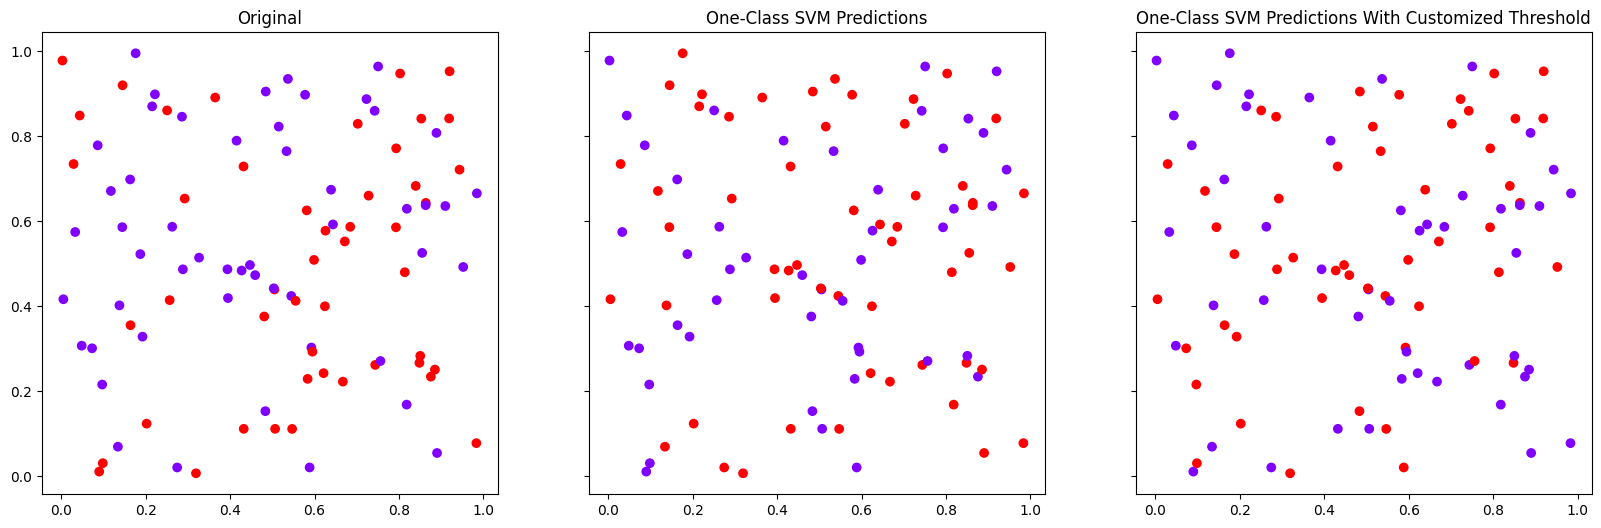

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Placeholder data
X_test = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100)
})
y_test = np.random.randint(0, 2, size=100)
prediction = np.random.randint(0, 2, size=100)
customized_prediction = np.random.randint(0, 2, size=100)

# Create a DataFrame for visualization
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_customized'] = customized_prediction

# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(20, 6))

# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction'], cmap='rainbow')

# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction_customized'], cmap='rainbow')

plt.show()
#in the plots below we can see that between the original and the one-class svm predictions we misses some fraudulent evnt but with a customize treshold we detected the fraud but the number of false positives

# Test on a new data1

In [12]:
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\frauddetction_prepro.csv"
df_test=pd.read_csv(path, low_memory=False, delimiter=',')

In [13]:
df_test.columns

Index(['IDENTIFIANT_DUM', 'ID_OPERATEUR', 'ID_TRANSITAIRE', 'POIDSBRUTTOTAL',
       'POIDSNETTOTAL', 'QUANTITEV0', 'NGPV0', 'POIDV0', 'VALEURV0',
       'ADUM_NUM_QUANTNORMV0', 'FRAUD'],
      dtype='object')

In [14]:
df_test

,IDENTIFIANT_DUM,ID_OPERATEUR,ID_TRANSITAIRE,POIDSBRUTTOTAL,POIDSNETTOTAL,QUANTITEV0,NGPV0,POIDV0,VALEURV0,ADUM_NUM_QUANTNORMV0,FRAUD
0,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.621254,0.910050,-0.354726,-0.354772,-0.327770,1
1,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.620196,1.021311,-0.358702,-0.359167,-0.298741,1
2,-2.454333,-0.701693,-2.005187,3.220638,3.220553,-0.621254,1.019458,3.215827,3.668331,-0.327770,0
3,-0.435077,-0.016782,-1.475446,1.948145,1.948817,-0.621254,0.848410,1.965338,0.968926,-0.327770,0
4,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.621254,0.861502,-0.354726,-0.354772,-0.327770,1
5,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.621254,1.025071,-0.360690,-0.359900,-0.314019,1
6,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.621254,0.902498,-0.360690,-0.359900,-0.327770,1
7,-0.611920,0.787936,0.686162,-0.394536,-0.392470,-0.621254,0.898113,-0.360690,-0.359900,-0.327770,1
8,-0.407132,-2.084106,-1.494341,-0.364424,-0.362375,2.266256,-0.524051,-0.307241,0.074657,3.841797,0
9,0.660954,-0.758458,0.391866,-0.274206,-0.276087,2.551939,-0.896509,-0.327489,-0.265739,-0.058864,1


In [15]:
df_test=df_test.drop('FRAUD', axis=1) 

In [99]:
# Assuming you have the trained One-Class SVM model 'one_class_svm' and the calculated score_threshold

# Get the scores for the new data using the One-Class SVM model
score_new_data = one_class_svm.score_samples(df_test)

# Make predictions using the adjusted threshold
customized_prediction_new_data = [1 if score < score_threshold else 0 for score in score_new_data]

# Add the predictions as a new column in df_test
#df_test['customized_predictions'] = customized_prediction_new_data

# Print the updated df_test DataFrame
print(df_test)


    IDENTIFIANT_DUM  ID_OPERATEUR  ID_TRANSITAIRE  POIDSBRUTTOTAL  \
0         -0.611920      0.787936        0.686162       -0.394536   
1         -0.611920      0.787936        0.686162       -0.394536   
2         -2.454333     -0.701693       -2.005187        3.220638   
3         -0.435077     -0.016782       -1.475446        1.948145   
4         -0.611920      0.787936        0.686162       -0.394536   
5         -0.611920      0.787936        0.686162       -0.394536   
6         -0.611920      0.787936        0.686162       -0.394536   
7         -0.611920      0.787936        0.686162       -0.394536   
8         -0.407132     -2.084106       -1.494341       -0.364424   
9          0.660954     -0.758458        0.391866       -0.274206   
10         0.660954     -0.758458        0.391866       -0.274206   
11         0.660954     -0.758458        0.391866       -0.274206   
12         0.660954     -0.758458        0.391866       -0.274206   
13         0.660954     -0.758458 

In [ ]:
# Make predictions using the trained model
df_test['predictions'] = one_class_svm.predict(df_test)

# Test on a new data2


In [24]:
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\Restlt_Script_preprocessed.csv"
df_test2=pd.read_csv(path, low_memory=False, delimiter=',')

In [26]:
df_test2=df_test2.drop('FRAUD', axis=1) 

In [27]:
# Make predictions using the trained model
df_test2['predictions'] = one_class_svm.predict(df_test2)


In [28]:
df_test2.head(20)

,IDENTIFIANT_DUM,ID_OPERATEUR,ID_TRANSITAIRE,POIDSBRUTTOTAL,POIDSNETTOTAL,QUANTITEV0,NGPV0,POIDV0,VALEURV0,ADUM_NUM_QUANTNORMV0,predictions
0,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.991637,-0.038875,-0.049633,-0.004380,-1
1,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044087,1.082086,-0.038911,-0.049858,-0.004379,-1
2,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.952171,-0.038875,-0.049633,-0.004380,-1
3,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,1.085143,-0.038929,-0.049896,-0.004380,-1
4,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.985498,-0.038929,-0.049896,-0.004380,-1
5,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.981933,-0.038929,-0.049896,-0.004380,-1
6,-1.538809,1.094555,-0.961805,-0.013883,-0.013213,-0.044088,1.080580,-0.006619,0.156800,-0.004380,1
7,-1.377004,1.872180,-0.547557,-0.025117,-0.024459,-0.044088,0.941528,-0.017916,0.018288,-0.004380,1
8,-1.374765,-0.474994,-0.562332,-0.045535,-0.044896,-0.039946,-0.174203,-0.038446,-0.027598,-0.004242,1
9,-1.289178,1.030105,0.912651,-0.044738,-0.044133,-0.039536,-0.476989,-0.038629,-0.045064,-0.004371,1


# XGB ON UMBALANCED DATA

In [102]:
# Splitting into features (X) and target (y)
X = df.drop('FRAUD', axis=1)  
y = df['FRAUD']

# Splitting into training and testing sets for features and target
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix


# Train the XGBoost model
model = xgb.XGBClassifier()
model.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred2 = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred2)
print("Accuracy:", accuracy)

# Print confusion matrix
cm = confusion_matrix(ytest, y_pred2)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9990441314529334
Confusion Matrix:
[[1521606      73]
 [   1383     160]]


In [ ]:
%%time

model = xgb.XGBClassifier(max_depth=12,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=300,
                        learning_rate = 0.01)
eval_set = [(xtrain, ytrain), (test_X, test_Y)]
model.fit(xtrain, ytrain.values.ravel(), early_stopping_rounds=15, eval_metric=[\"error\", \"logloss\"] , eval_set=eval_set, verbose=True)

In [21]:
from sklearn.metrics import classification_report
# Print classification report
classification_rep = classification_report(ytest, y_pred2)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1521679
         1.0       0.69      0.10      0.18      1543

    accuracy                           1.00   1523222
   macro avg       0.84      0.55      0.59   1523222
weighted avg       1.00      1.00      1.00   1523222



# XGB ON 100000 NON FRAUD

In [31]:
# Splitting into features (X) and target (y)
X = final_df.drop('FRAUD', axis=1)  
y = final_df['FRAUD'].astype('int32')

# Splitting into training and testing sets for features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

model = xgb.XGBClassifier(max_depth=0,
                        sampling_method="gradient_based",
                        booster="dart",
                        subsample=0.075,
                        tree_method="gpu_hist",
                        objective='binary:logistic',
                        n_estimators=20000,
                        learning_rate = 0.01)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=30, eval_metric=["error", "logloss"] , eval_set=eval_set, verbose=True)

c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-error:0.06602	validation_0-logloss:0.68454	validation_1-error:0.07229	validation_1-logloss:0.68466
[1]	validation_0-error:0.04977	validation_0-logloss:0.67606	validation_1-error:0.05255	validation_1-logloss:0.67626
[2]	validation_0-error:0.04847	validation_0-logloss:0.66770	validation_1-error:0.05317	validation_1-logloss:0.66800
[3]	validation_0-error:0.04386	validation_0-logloss:0.65957	validation_1-error:0.04775	validation_1-logloss:0.65998
[4]	validation_0-error:0.04390	validation_0-logloss:0.65157	validation_1-error:0.04988	validation_1-logloss:0.65206
[5]	validation_0-error:0.04180	validation_0-logloss:0.64376	validation_1-error:0.04728	validation_1-logloss:0.64436
[6]	validation_0-error:0.04120	validation_0-logloss:0.63604	validation_1-error:0.04710	validation_1-logloss:0.63672
[7]	validation_0-error:0.04033	validation_0-logloss:0.62845	validation_1-error:0.04533	validation_1-logloss:0.62923
[8]	validation_0-error:0.04016	validation_0-logloss:0.62104	validation_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
y_pred3 = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Print confusion matrix
cm2 = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(cm2)

Accuracy: 0.9660728117738188
Confusion Matrix:
[[29710   306]
 [  789  1470]]


In [38]:
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\Restlt_Script_preprocessed.csv"
df_test2=pd.read_csv(path, low_memory=False, delimiter=',')

In [39]:
df_test2

,IDENTIFIANT_DUM,ID_OPERATEUR,ID_TRANSITAIRE,POIDSBRUTTOTAL,POIDSNETTOTAL,QUANTITEV0,NGPV0,POIDV0,VALEURV0,ADUM_NUM_QUANTNORMV0,FRAUD
0,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.991637,-0.038875,-0.049633,-0.004380,1
1,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044087,1.082086,-0.038911,-0.049858,-0.004379,1
2,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.952171,-0.038875,-0.049633,-0.004380,1
3,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,1.085143,-0.038929,-0.049896,-0.004380,1
4,-1.391175,2.785832,1.142786,-0.045801,-0.045163,-0.044088,0.985498,-0.038929,-0.049896,-0.004380,1
...,...,...,...,...,...,...,...,...,...,...,...
95212,1.742800,2.373640,-0.963207,-0.042907,-0.043637,-0.044073,-0.871569,-0.038936,-0.049828,-0.004380,1
95213,1.742800,2.373640,-0.963207,-0.042907,-0.043637,-0.044084,-0.870966,-0.038942,-0.049916,-0.004380,1
95214,1.742800,2.373640,-0.963207,-0.042907,-0.043637,-0.044082,-0.870013,-0.038944,-0.049922,-0.004380,1
95215,1.742800,2.373640,-0.963207,-0.042907,-0.043637,-0.044078,-0.869963,-0.038913,-0.049835,-0.004379,1


In [40]:
df_test2=df_test2.drop('FRAUD', axis=1) 

In [ ]:
# Make predictions using the trained model
predictions = model.predict(df_test2)

# Add predictions as a new column to df_test2
df_test2['new_predictions'] = np.squeeze(predictions)

In [18]:
from sklearn.metrics import classification_report
# Print classification report
classification_rep = classification_report(y_test, y_pred3)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     20037
         1.0       0.80      0.65      0.72      1480

    accuracy                           0.96     21517
   macro avg       0.88      0.82      0.85     21517
weighted avg       0.96      0.96      0.96     21517



# NN WITHOUT UNDERSAMPLING

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Define features and target variable
X = df.drop('FRAUD', axis=1).values
y = df['FRAUD'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = model.predict_classes(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/10
85682/85682 [==============================] - 240s 3ms/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 2/10
85682/85682 [==============================] - 206s 2ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0065 - val_accuracy: 0.9990
Epoch 3/10
85682/85682 [==============================] - 206s 2ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 4/10
85682/85682 [==============================] - 205s 2ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 5/10
85682/85682 [==============================] - 210s 2ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 6/10
85682/85682 [==============================] - 215s 3ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 7/10
85682/85682 [==============================] - 220s 3ms/step - loss: 0.0064 - accuracy: 0.9990 - val_

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# After training your model

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

47601/47601 [==============================] - 90s 2ms/step


c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\.conda\envs\newpycaret\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1521679
         1.0       0.00      0.00      0.00      1543

    accuracy                           1.00   1523222
   macro avg       0.50      0.50      0.50   1523222
weighted avg       1.00      1.00      1.00   1523222

[[1521679       0]
 [   1543       0]]


# NN ON 100000 of non-fraud

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Define features and target variable
X = final_df.drop('FRAUD', axis=1).values
y = final_df['FRAUD'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# After training your model

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Epoch 1/10
1211/1211 [==============================] - 5s 3ms/step - loss: 0.2081 - accuracy: 0.9246 - val_loss: 0.1595 - val_accuracy: 0.9283
Epoch 2/10
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1686 - accuracy: 0.9295 - val_loss: 0.1578 - val_accuracy: 0.9301
Epoch 3/10
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1643 - accuracy: 0.9286 - val_loss: 0.1554 - val_accuracy: 0.9283
Epoch 4/10
1211/1211 [==============================] - 3s 3ms/step - loss: 0.1622 - accuracy: 0.9295 - val_loss: 0.1538 - val_accuracy: 0.9283
Epoch 5/10
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1590 - accuracy: 0.9297 - val_loss: 0.1523 - val_accuracy: 0.9313
Epoch 6/10
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1578 - accuracy: 0.9295 - val_loss: 0.1509 - val_accuracy: 0.9360
Epoch 7/10
1211/1211 [==============================] - 4s 3ms/step - loss: 0.1573 - accuracy: 0.9304 - val_loss: 0.1498 - val_accuracy:

# NN WITH UNDERSAMPLINH

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

# Separate the majority and minority classes
nonfraudulent = df[df['FRAUD'] == 0]
fraudulent = df[df['FRAUD'] == 1]

# Undersample the majority class
undersampled_nonfraudulent = resample(nonfraudulent, replace=False, n_samples=len(fraudulent), random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([undersampled_nonfraudulent, fraudulent])

# Shuffle the combined DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Define features and target variable
X_undersampled = undersampled_df.drop('FRAUD', axis=1)
y_undersampled = undersampled_df['FRAUD']

# Split the undersampled data into train and test sets
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(
    X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_undersampled = scaler.fit_transform(X_train_undersampled)
X_test_undersampled = scaler.transform(X_test_undersampled)

# Build a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_undersampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the undersampled data
model.fit(X_train_undersampled, y_train_undersampled, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_undersampled, y_test_undersampled)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_undersampled = model.predict(X_test_undersampled)
y_pred_undersampled = (y_pred_undersampled > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y_test_undersampled, y_pred_undersampled))
print(confusion_matrix(y_test_undersampled, y_pred_undersampled))


Epoch 1/10
171/171 [==============================] - 2s 5ms/step - loss: 0.5384 - accuracy: 0.7443 - val_loss: 0.4018 - val_accuracy: 0.8336
Epoch 2/10
171/171 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.8243 - val_loss: 0.3629 - val_accuracy: 0.8361
Epoch 3/10
171/171 [==============================] - 1s 4ms/step - loss: 0.3793 - accuracy: 0.8287 - val_loss: 0.3517 - val_accuracy: 0.8427
Epoch 4/10
171/171 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8343 - val_loss: 0.3434 - val_accuracy: 0.8451
Epoch 5/10
171/171 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8346 - val_loss: 0.3385 - val_accuracy: 0.8468
Epoch 6/10
171/171 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8368 - val_loss: 0.3343 - val_accuracy: 0.8460
Epoch 7/10
171/171 [==============================] - 1s 4ms/step - loss: 0.3517 - accuracy: 0.8391 - val_loss: 0.3306 - val_accuracy: 0.8476
Epoch 